In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 # figure dots per inch
%matplotlib inline

import seaborn as sns
sns.set()

In [3]:
# Load members
members_df = pd.read_pickle('Data/members_clean.pickle')
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,NaN,missing,7,20110914,2011-09-14
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34.0,male,9,20110916,2011-09-16
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63.0,male,9,20110918,2011-09-18
10,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,NaN,missing,7,20110918,2011-09-18
13,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28.0,female,9,20110920,2011-09-20


In [4]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857038 entries, 1 to 6769469
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   msno                       857038 non-null  object        
 1   city                       857038 non-null  int64         
 2   bd                         359028 non-null  float64       
 3   gender                     857038 non-null  object        
 4   registered_via             857038 non-null  int64         
 5   registration_init_time     857038 non-null  int64         
 6   registration_init_time_dt  857038 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 52.3+ MB


In [5]:
members_df.isnull().sum()

msno                              0
city                              0
bd                           498010
gender                            0
registered_via                    0
registration_init_time            0
registration_init_time_dt         0
dtype: int64

In [6]:
members_df.nunique()

msno                         857038
city                             21
bd                               99
gender                            3
registered_via                    5
registration_init_time         4723
registration_init_time_dt      4723
dtype: int64

In [7]:
city_freq = members_df.city.value_counts(normalize=True)
city_freq

1     0.550910
13    0.103621
5     0.080160
4     0.053462
22    0.043664
15    0.042374
6     0.027384
14    0.020745
12    0.013229
9     0.010015
8     0.008577
11    0.008494
18    0.008198
10    0.007041
21    0.006035
3     0.005742
17    0.005621
7     0.002666
16    0.001078
20    0.000816
19    0.000169
Name: city, dtype: float64

In [8]:
# 80-20 rule
bottom_cities = city_freq.quantile(q=0.8)
less_freq_cities = city_freq[city_freq<=bottom_cities]
less_freq_cities 

22    0.043664
15    0.042374
6     0.027384
14    0.020745
12    0.013229
9     0.010015
8     0.008577
11    0.008494
18    0.008198
10    0.007041
21    0.006035
3     0.005742
17    0.005621
7     0.002666
16    0.001078
20    0.000816
19    0.000169
Name: city, dtype: float64

In [9]:
members_df.loc[members_df['city'].isin(less_freq_cities.index.tolist()), 'city'] = 'other'
members_df['city'] = members_df['city'].apply(lambda x: "{}{}".format('city_', x))
members_df['city']

1              city_1
7              city_5
9             city_13
10             city_1
13             city_4
              ...    
6769443        city_1
6769465        city_1
6769466        city_1
6769467    city_other
6769469        city_1
Name: city, Length: 857038, dtype: object

In [10]:
members_df.registered_via.value_counts()

7     481482
9     210378
3     103910
4      58014
13      3254
Name: registered_via, dtype: int64

In [11]:
members_df['registered_via'] = members_df['registered_via'].apply(lambda x: "{}{}".format('registered_via_', x))
members_df['registered_via']

1          registered_via_7
7          registered_via_9
9          registered_via_9
10         registered_via_7
13         registered_via_9
                 ...       
6769443    registered_via_7
6769465    registered_via_7
6769466    registered_via_7
6769467    registered_via_7
6769469    registered_via_7
Name: registered_via, Length: 857038, dtype: object

In [12]:
users_feb = pd.read_pickle('Data/train_v1_scala_clean.pickle')
users_mar = pd.read_pickle('Data/train_v2_scala_clean.pickle')
users_apr = pd.read_csv('sample_submission_v2.csv')
users_feb.shape, \
users_mar.shape, \
users_apr.shape

((879537, 2), (886500, 2), (907471, 2))

In [13]:
members_feb = pd.merge(users_feb.drop('is_churn', axis=1), members_df, on='msno', how='left')
members_mar = pd.merge(users_mar.drop('is_churn', axis=1), members_df, on='msno', how='left')
members_apr = pd.merge(users_apr.drop('is_churn', axis=1), members_df, on='msno', how='left')

In [14]:
members_feb.shape, \
members_mar.shape, \
members_apr.shape

((879537, 7), (886500, 7), (907471, 7))

In [15]:
members_feb.isnull().sum()

msno                              0
city                         110860
bd                           571405
gender                       110860
registered_via               110860
registration_init_time       110860
registration_init_time_dt    110860
dtype: int64

In [16]:
members_mar.isnull().sum()

msno                              0
city                         108749
bd                           572692
gender                       108749
registered_via               108749
registration_init_time       108749
registration_init_time_dt    108749
dtype: int64

In [17]:
members_apr.isnull().sum()

msno                              0
city                         171727
bd                           627659
gender                       171727
registered_via               171727
registration_init_time       171727
registration_init_time_dt    171727
dtype: int64

In [18]:
from datetime import datetime

# create a 'member_for_days' column - relative to beginning of month in which they churn
feb_today = datetime(2017, 2, 1)
mar_today = datetime(2017, 3, 1)
apr_today = datetime(2017, 4, 1)

members_feb['member_for_days'] = feb_today - members_feb['registration_init_time_dt']
members_mar['member_for_days'] = mar_today - members_mar['registration_init_time_dt']
members_apr['member_for_days'] = apr_today - members_apr['registration_init_time_dt']
members_feb['member_for_days'] = members_feb['member_for_days'].dt.days
members_mar['member_for_days'] = members_mar['member_for_days'].dt.days
members_apr['member_for_days'] = members_apr['member_for_days'].dt.days

In [19]:
members_feb['member_for_days'].head()

0     933.0
1       NaN
2    3896.0
3    4691.0
4    3238.0
Name: member_for_days, dtype: float64

In [20]:
members_mar['member_for_days'].head()

0     961.0
1       NaN
2       NaN
3    3924.0
4    4719.0
Name: member_for_days, dtype: float64

In [21]:
members_apr['member_for_days'].head()

0     623.0
1    4171.0
2     882.0
3       NaN
4     100.0
Name: member_for_days, dtype: float64

In [22]:
day_dict = {0: 'Mon',
            1: 'Tue',
            2: 'Wed',
            3: 'Thu',
            4: 'Fri',
            5: 'Sat',
            6: 'Sun'}
month_dict = {1: 'Jan',
             2: 'Feb',
             3: 'Mar',
             4: 'Apr',
             5: 'May',
             6: 'Jun',
             7: 'Jul',
             8: 'Aug',
             9: 'Sep',
             10: 'Oct',
             11: 'Nov',
             12: 'Dec'}

members_feb['registration_init_day'] = members_feb['registration_init_time_dt'].dt.weekday.map(day_dict)
members_mar['registration_init_day'] = members_mar['registration_init_time_dt'].dt.weekday.map(day_dict)
members_apr['registration_init_day'] = members_apr['registration_init_time_dt'].dt.weekday.map(day_dict)

members_feb['registration_init_month'] = members_feb['registration_init_time_dt'].dt.month.map(month_dict)
members_mar['registration_init_month'] = members_mar['registration_init_time_dt'].dt.month.map(month_dict)
members_apr['registration_init_month'] = members_apr['registration_init_time_dt'].dt.month.map(month_dict)

members_feb['registration_init_year'] = members_feb['registration_init_time_dt'].dt.year
members_mar['registration_init_year'] = members_mar['registration_init_time_dt'].dt.year
members_apr['registration_init_year'] = members_apr['registration_init_time_dt'].dt.year

In [23]:
members_feb = members_feb.drop('registration_init_time_dt', axis=1)
members_mar = members_mar.drop('registration_init_time_dt', axis=1)
members_apr = members_apr.drop('registration_init_time_dt', axis=1)

In [24]:
members_feb.head()

,msno,city,bd,gender,registered_via,registration_init_time,member_for_days,registration_init_day,registration_init_month,registration_init_year
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,city_1,NaN,missing,registered_via_7,20140714.0,933.0,Mon,Jul,2014.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,city_other,31.0,male,registered_via_9,20060603.0,3896.0,Sat,Jun,2006.0
3,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,city_other,31.0,male,registered_via_9,20040330.0,4691.0,Tue,Mar,2004.0
4,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,city_other,29.0,male,registered_via_9,20080322.0,3238.0,Sat,Mar,2008.0


In [25]:
members_mar.head()

,msno,city,bd,gender,registered_via,registration_init_time,member_for_days,registration_init_day,registration_init_month,registration_init_year
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,city_1,NaN,missing,registered_via_7,20140714.0,961.0,Mon,Jul,2014.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,+/g9O3USecrC8npzaFHXW/2XJ7fB80SineiUoCg7M6o=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,city_other,31.0,male,registered_via_9,20060603.0,3924.0,Sat,Jun,2006.0
4,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,city_other,31.0,male,registered_via_9,20040330.0,4719.0,Tue,Mar,2004.0


In [26]:
members_apr.head()

,msno,city,bd,gender,registered_via,registration_init_time,member_for_days,registration_init_day,registration_init_month,registration_init_year
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,city_1,NaN,missing,registered_via_7,20150718.0,623.0,Sat,Jul,2015.0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,city_4,28.0,male,registered_via_9,20051030.0,4171.0,Sun,Oct,2005.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,city_4,34.0,male,registered_via_7,20141101.0,882.0,Sat,Nov,2014.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,city_1,NaN,missing,registered_via_13,20161222.0,100.0,Thu,Dec,2016.0


In [27]:
members_feb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879537 entries, 0 to 879536
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   msno                     879537 non-null  object 
 1   city                     768677 non-null  object 
 2   bd                       308132 non-null  float64
 3   gender                   768677 non-null  object 
 4   registered_via           768677 non-null  object 
 5   registration_init_time   768677 non-null  float64
 6   member_for_days          768677 non-null  float64
 7   registration_init_day    768677 non-null  object 
 8   registration_init_month  768677 non-null  object 
 9   registration_init_year   768677 non-null  float64
dtypes: float64(4), object(6)
memory usage: 73.8+ MB


In [28]:
members_mar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886500 entries, 0 to 886499
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   msno                     886500 non-null  object 
 1   city                     777751 non-null  object 
 2   bd                       313808 non-null  float64
 3   gender                   777751 non-null  object 
 4   registered_via           777751 non-null  object 
 5   registration_init_time   777751 non-null  float64
 6   member_for_days          777751 non-null  float64
 7   registration_init_day    777751 non-null  object 
 8   registration_init_month  777751 non-null  object 
 9   registration_init_year   777751 non-null  float64
dtypes: float64(4), object(6)
memory usage: 74.4+ MB


In [29]:
members_apr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   msno                     907471 non-null  object 
 1   city                     735744 non-null  object 
 2   bd                       279812 non-null  float64
 3   gender                   735744 non-null  object 
 4   registered_via           735744 non-null  object 
 5   registration_init_time   735744 non-null  float64
 6   member_for_days          735744 non-null  float64
 7   registration_init_day    735744 non-null  object 
 8   registration_init_month  735744 non-null  object 
 9   registration_init_year   735744 non-null  float64
dtypes: float64(4), object(6)
memory usage: 76.2+ MB


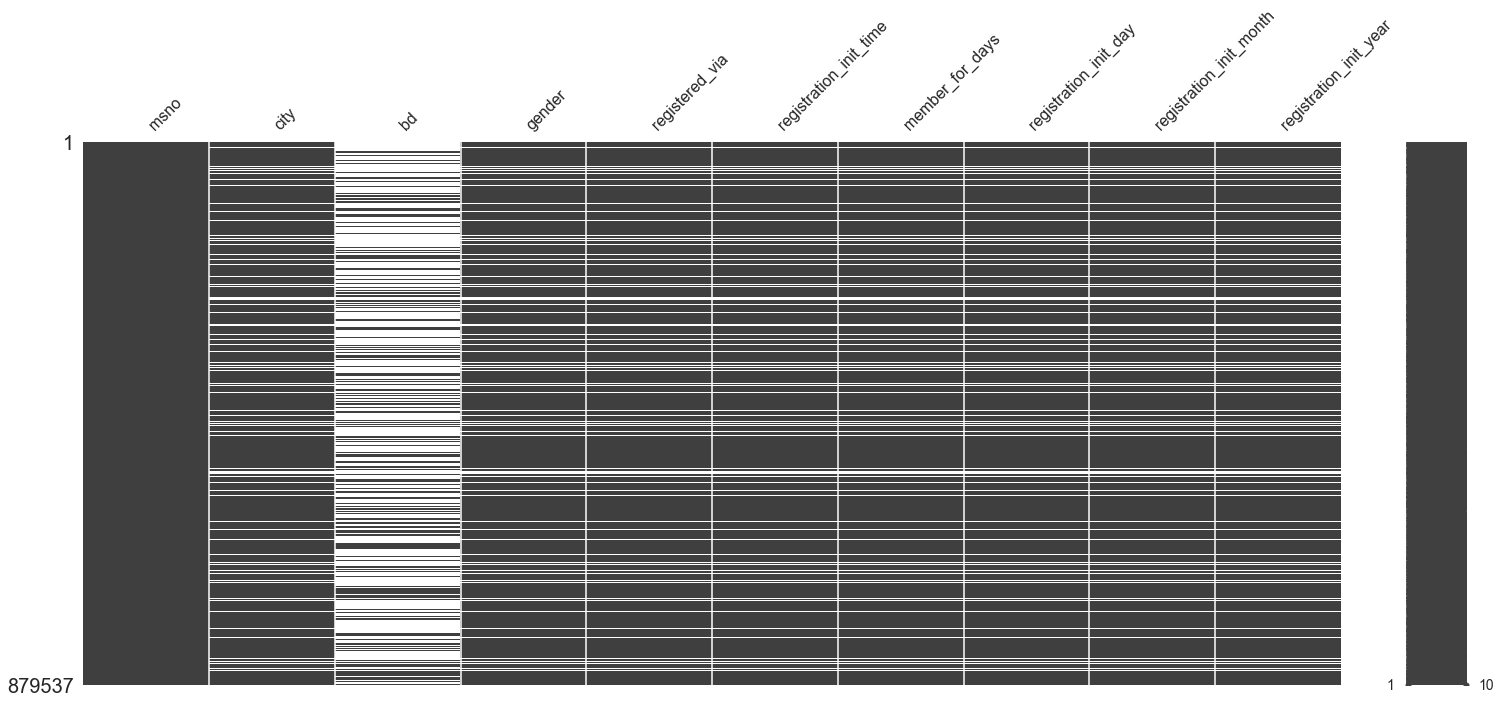

In [30]:
import missingno as ms

ms.matrix(members_feb)
plt.tight_layout()

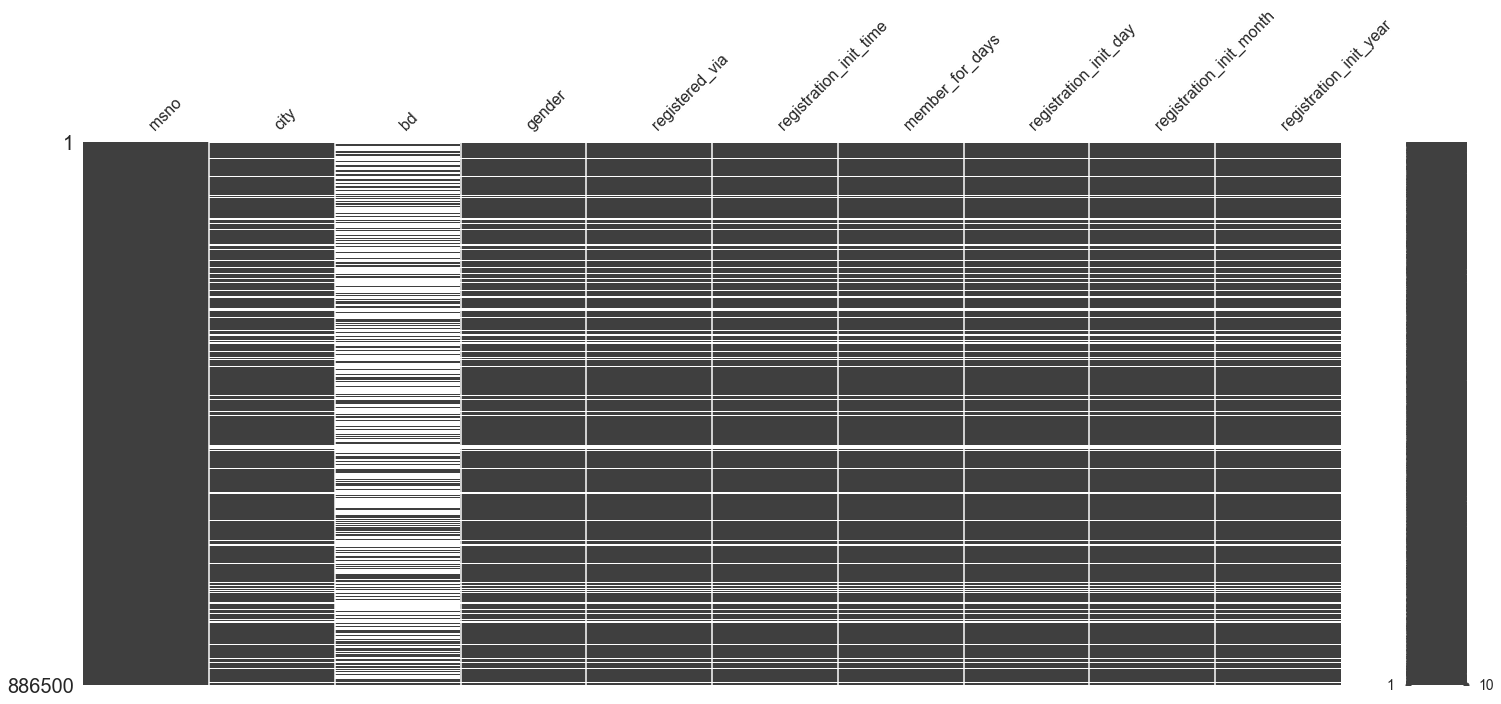

In [31]:
ms.matrix(members_mar)
plt.tight_layout()

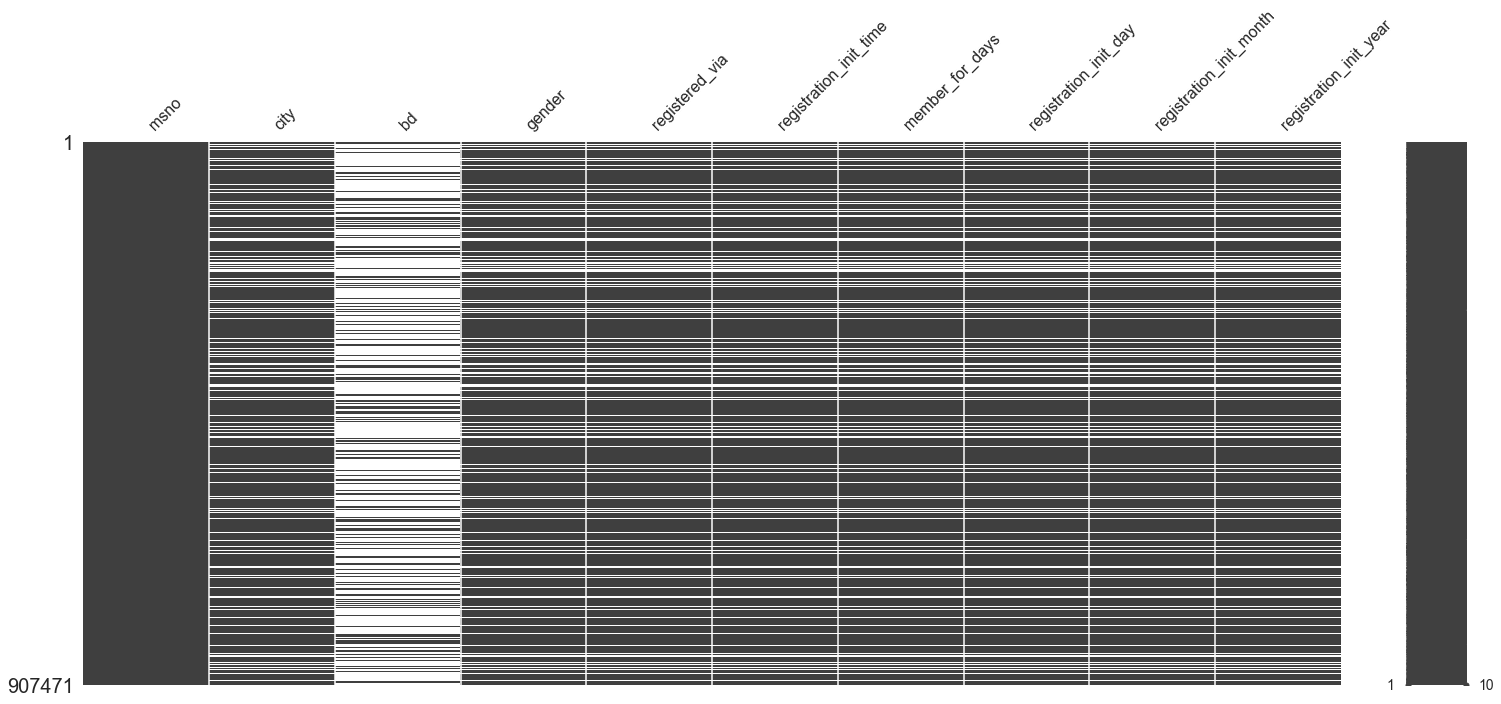

In [32]:
ms.matrix(members_apr)
plt.tight_layout()

In [33]:
import pickle

with open('Data/Processed/members_feb.pickle', 'wb') as handle:
    pickle.dump(members_feb, handle)
with open('Data/Processed/members_mar.pickle', 'wb') as handle:
    pickle.dump(members_mar, handle)
with open('Data/Processed/members_apr.pickle', 'wb') as handle:
    pickle.dump(members_apr, handle)